# Galerkin Approach

Before moving to more difficult differential equations, consider just the following trivial equation

$$
f(x) \approx u(x)
$$

Through the finite element method, we try to approximate $f$ through the approximation $u$, which is a sum of $N$ different prescribed functions $\psi_i(x)$ and unknown coefficients $c_i$:

$$
u(x) = \sum_{i=0}^N c_i \psi_i(x)
$$

## Approximation of Vectors
Consider that $\mathbf{f} = (f_1, f_2)$ is a vector. Let's try to approximate it through  another vector $\mathbf{u}$, which is aligned in the direction of an arbitrary basis $\mathbf{\psi}_0 = (e_1, e_2)$ the vector space $V$.

### Aim
Find the vector $\mathbf{u} = c_0 \mathbf{\psi}_0 \in V$ that is the best approximation to the vector $\mathbf{f}$.

### Criterion
Minimize the length of the difference between approximation $\mathbf{u}$ and solution $\mathbf{f}$.
Herefore, the error $\mathbf{e} = \mathbf{f} - \mathbf{u}$ is introduced, whose length is defined through
$$
||\mathbf{e}|| = (\mathbf{e} \cdot \mathbf{e})^{1/2}
$$

with the inner product 
$$(\mathbf{x} \cdot \mathbf{y}) = \sum_{i=0}^{N} x_i y_i$$

#### The least squares method
In order to minimize $||\mathbf{e}||$ and thereby find $c_0$, which gives the best approximation of $\mathbf{u}$ to $\mathbf{f}$, we introduce the function
$$
E(c_0) = (\mathbf{e} \cdot \mathbf{e}) 
= \left((\mathbf{f} - c_0 \mathbf{\psi}_0) \cdot (\mathbf{f} - c_0 \mathbf{\psi}_0) \right)
= (\mathbf{f} \cdot \mathbf{f}) - 2 c_0 (\mathbf{f} \cdot \mathbf{\psi}_0) 
+ c_0^2 (\mathbf{\psi}_0 \cdot \mathbf{\psi}_0).
$$

To find the optimum value of $c_0$, we have to set the derivative of $E(c_0)$ for $c_0$ to zero:
$$
\frac{\partial E(c_0)}{\partial c_0} = 0 
$$

In this case, this reduces to the following equation:

$$
\frac{\partial E(c_0)}{\partial c_0} = 
- 2 (\mathbf{f} \cdot \mathbf{\psi}_0) 
+ 2 c_0 (\mathbf{\psi}_0 \cdot \mathbf{\psi}_0)
= 0
$$
which can also be written as
$$
\left( (\mathbf{f}- c_0 \mathbf{\psi}_0) \cdot \mathbf{\psi}_0\right) = 0
$$
or 
$$
(\mathbf{e} \cdot \mathbf{\psi}_0 ) = 0
$$

This can be solved for $c_0$:
$$c_0 = \frac{(\mathbf{f} \cdot \mathbf{\psi}_0) }{(\mathbf{\psi}_0 \cdot \mathbf{\psi}_0)}
$$

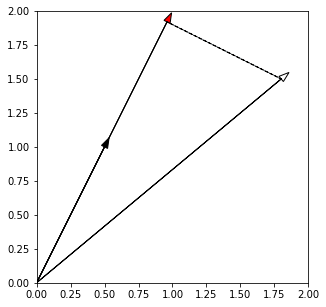

In [38]:
%matplotlib inline
from matplotlib import pyplot as plt

'''*********************************************
Function: Compute scalar product between two
          vectors a and b
*********************************************'''
def scalar_product(a, b):
    if (len(a) != len(b)):
        print("Error: Vectors are not of equal size.")
        return None
    else:
        return sum([a[i]*b[i] for i in range(len(a))])

# Define solution vector f
f = (1.8, 1.5)

# Define basis vector
psi_0 = (0.5, 1)

# Compute c_0 value
c_0 = scalar_product(f, psi_0) / scalar_product(psi_0, psi_0)

# Compute approximation to f
u = (c_0*psi_0[0], c_0*psi_0[1])

# Compute error
e = (f[0]-u[0], f[1]-u[1])

fig = plt.figure()
fig.set_size_inches(5,5)
ax = fig.add_subplot(111)
ax.set_aspect('equal')

f_vector   = ax.arrow(0, 0, f[0], f[1], head_width=0.05, fc='w')
psi_vector = ax.arrow(0, 0, psi_0[0],psi_0[1], head_width=0.05, fc='k')
u_vector   = ax.arrow(0, 0, u[0], u[1], head_width=0.05, fc='r')
error      = ax.arrow(u[0], u[1], e[0], e[1], ls='--')

ax.set_xlim([0,2])
ax.set_ylim([0,2])


plt.show()

## Generalization to spaces with arbitrary dimension

We now want to find the approximation $\mathbf{u}$ for an vector $\mathbf{f}$ in the space $V = \text{span}(\mathbf{\psi}_0, ..., \mathbf{\psi}_N)$ of an arbitrary dimension $N+1$. 
The basis vectors $\mathbf{\psi}_0, ..., \mathbf{\psi}_N$ are chose to be linearly independent.

The approximation vector $\mathbf{u}$ can be written as 
$$
\mathbf{u} = \sum_{j=0}^{N} c_j \mathbf{\psi}_j
$$

### Least squares method for vectors of arbitrary dimension
Again the error that will be minimized is defined as $\mathbf{e} = \mathbf{f} - \mathbf{u}$. 
Next, the squared distance is defined as
$$
E(c_0, ..., c_1) 
= (\mathbf{e} \cdot \mathbf{e}) 
= \left( \mathbf{f} \cdot \mathbf{f} \right) 
- 2 \sum_{j}^N c_j (\mathbf{f} \cdot \mathbf{\psi}_j )
+ \sum_{p}^N \sum_{q}^N c_p c_q (\mathbf{\psi}_p \cdot \mathbf{\psi}_q)
$$
In order to minimize $E$, its derivatives for all $c_i$ is set to zero
$$
\frac{\partial E}{\partial c_i} = 0, \quad i=0,...,N
$$

Differentiation of all terms leads to the following system of $N+1$ linear equations:
$$
\sum_{j=0}^{N} A_{i,j} c_j = b_i, \quad i=0,...,N
$$
with
$$
A_{i,j} = (\mathbf{\psi}_i \cdot \mathbf{\psi}_j)
$$
and
$$
b_i = (\mathbf{\psi}_i \cdot \mathbf{f} )
$$

## Approximation of functions
Now consider a set of $N+1$ basis functions $\psi_0, ..., \psi_N$, which form a so called function space $V = \text{span}(\psi_0, ..., \psi_N)$.
Any function $u$ can now be written as a weighted sum of all basis functions $\psi_i$ from the function space $V$.
$$
u = \sum_{j=0}^N c_j \psi_j
$$

### The least squares method
The task is now, to find the right values of $c_j$ in order to approximate $u$ with the smallest possible error to a given function $f$.
For now we look at functions that vary only in a single variable $x$, e.g. $u(x), f(x),...$

The norm for measuring the distance between $u(x)$ and $f(x)$ will now be defined through
$$
E = (e(x) \cdot e(x)) = \int_{\Omega} e(x) e(x) \text{d}x
$$
with $e(x) = f(x) - u(x)$.
This formulation can be rearranged to
$$
E(c_i, ..., c_N) = (f\cdot f) - 2 \sum_{j=0}^N c_j (f \cdot \psi_i) \sum_{p=0}^N \sum_{q=0}^N c_p c_q (\psi_p \cdot \psi_q)
$$

Again, this function is minimized through setting its derivatives for $c_i$ to zero. This leads again to a linear equation system (as in the vector space case) of the form
$$
\mathbf{A} \mathbf{x} = \mathbf{b}
$$

with the coefficients
$$
A_{ij} = (\psi_i \cdot \psi_j)
$$
$$
b_i = (f \cdot \psi_i)
$$


### Example
$$
f(x) = 10(x-1)^2 - 1, \qquad x \in \Omega = \left[1,2\right]
$$

Find the best approximation $u(x)$ in the space of all linear functions:

$$
V = \text{span}(1,x)
$$



In [44]:
import numpy as np
import scipy.integrate as integrate

#=======================================================
# Implementation of the least squares method for the 
# approximation of a function f(x)
#=======================================================

#-------------------------------------------------------
def convolute(f, g, Omega):
    '''Calculates the integral over f*g over the domain 
    omega=(x_start, x_end)'''    
    return integrate.quad(lambda x: f(x) * g(x), 
                          Omega[0], Omega[1],
                          epsabs=1e-9, epsrel=1e-9)[0]

#-------------------------------------------------------
def init_A(psi, Omega, N):
    '''Sets up the matrix "A" of the linear 
    equation system'''
    A = np.zeros((N+1,N+1))
    for i in range(N+1):
        for j in range(N+1):
            A[i][j] = convolute(psi(i), psi(j), Omega)
    return A
    
#-------------------------------------------------------
def init_b(f, psi, Omega, N):
    '''Sets up the right hand side "b" of the linear 
    equation system'''
    b = np.zeros(N+1)
    for i in range(N+1):
        b[i] = convolute(f, psi(i), Omega)
    return b

#-------------------------------------------------------
def least_squares(f, psi, x, N, **kwargs):
    '''Sets up and solves the linear equation and returns 
    the c_i values and the approximation u(x)'''
    # Determine function space
    #---------------------------------------------------
    Omega = (x[0], x[-1])
    
    # Set up the linear equation system
    #---------------------------------------------------
    A = init_A(psi, Omega, N)
    b = init_b(f, psi, Omega, N)
    
    if (kwargs.get('show_A', False)):
        print("A:")
        print(A)
    if (kwargs.get('show_b', False)):
        print("b:")
        print(b)
    
    # Solve the linear equation system
    #---------------------------------------------------
    if (kwargs.get('orthogonal_basis', False)):
        c = [b[i] / A[i][i] for i in range(N+1)] 
    else:
        try:
            c =  np.linalg.solve(A, b)
        except:
            print("Could not solve the linear equation system.")
            c = [0.0] * (N+1)

    # Calculate the approximation function u(x)
    #--------------------------------------------------- 
    u  = sum(c[i]*psi(i)(x) for i in range(0, N+1))

    return (u, c)



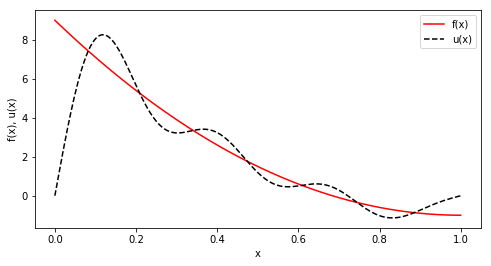

In [43]:
%matplotlib inline
from matplotlib import pyplot as plt

#=======================================================
# Implementation of the least squares method for the 
# approximation of a function f(x)
#=======================================================

# Import additional numpy functions and constants
#-------------------------------------------------------
from numpy import tanh, cos, sin, pi

# Define the basis functions
#-------------------------------------------------------
def psi(i):
    '''This function returns the psi basis functions'''
    #return lambda x: x**i 
    return lambda x: sin((i+1)*pi*x)

# Define the function f(x)
#-------------------------------------------------------
f = lambda x: 10.*(x-1.)**2 - 1. #tanh(x-pi)

# Define the upper and lower bound of f(x)
#-------------------------------------------------------
x = np.linspace(0, 1, 501)
N = 6

# Compute least squares approximation to f(x)
#-------------------------------------------------------
(u, c) = least_squares(f, psi, x, N, 
                       orthogonal_basis=True,
                       show_A=False, show_b=False)

# Plot results
#-------------------------------------------------------
fig = plt.figure()
fig.set_size_inches(8,4)
ax = fig.add_subplot(111)
f_plt = ax.plot(x, f(x), c='r', ls='-', label='f(x)')
u_plt = ax.plot(x, u, c='k', ls='--', label='u(x)')
ax.set_xlabel('x') 
ax.set_ylabel('f(x), u(x)')
ax.legend()
plt.show()

## The interpolation / collocation method

For the collocation method, one demands that $u(x_i) = f(x_i)$ at selected interpolation points $x_i$ (also called collocation points).

$$
u(x_i) = \sum_{j=0}^N c_j \psi_j(x_i) = f(x_i), \qquad i=0,...,N
$$

The leads also to a linear equation system 
$$
\sum_{j=0}^N A_{i,j} c_j = b_i, \qquad i=0,...,N
$$
with 
$$
A_{i,j} = \psi_{j}(x_i)
$$
$$
b_i = f(x_i)
$$

This leads to a non-symmetric coefficient matrix $\mathbf{A}$, because in general $\psi_j(x_i) \neq \psi_i(x_j)$.


In [70]:
import numpy as np

#=======================================================
# Implementation of the collocation method for the 
# approximation of a function f(x)
#=======================================================

#-------------------------------------------------------
def init_A(psi, xi, N):
    '''Sets up the matrix "A" of the linear 
    equation system'''
    A = np.zeros((N+1,N+1))
    for i in range(N+1):
        for j in range(N+1):
            A[i][j] = psi(j)(xi[i])
    return A

#-------------------------------------------------------
def init_b(fi, N):
    '''Sets up the right hand side "b" of the linear 
    equation system'''
    b = np.zeros(N+1)
    for i in range(N+1):
        b[i] = fi[i]
    return b

#-------------------------------------------------------
def least_squares_collocated(fi, psi, xi, N, **kwargs):
    '''Sets up and solves the linear equation and returns 
    the c_i values and the approximation u(x)'''
    
    # Set up the linear equation system
    #---------------------------------------------------
    A = init_A(psi, xi, N)
    b = init_b(fi, N)
    
    if (kwargs.get('show_A', False)):
        print("A:")
        print(A)
    if (kwargs.get('show_b', False)):
        print("b:")
        print(b)
    
    # Solve the linear equation system
    #---------------------------------------------------
    if (kwargs.get('orthogonal_basis', False)):
        c = [b[i] / (A[i][i]+1e-30) for i in range(N+1)] 
    else:
        try:
            c =  np.linalg.solve(A, b)
        except:
            print("Could not solve the linear equation system.")
            c = [0.0] * (N+1)

    # Calculate the approximation function u(x)
    #--------------------------------------------------- 
    u  = sum(c[i]*psi(i)(x) for i in range(0, N+1))

    return (u, c)

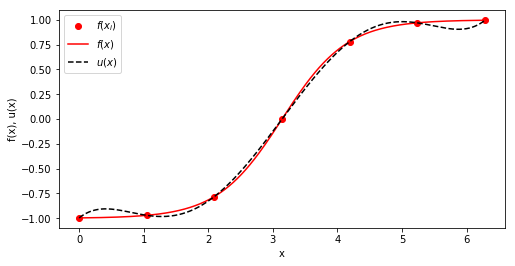

In [86]:
%matplotlib inline
from matplotlib import pyplot as plt

#=======================================================
# Implementation of the collocation method for the 
# approximation of a function f(x)
#=======================================================

# Import additional numpy functions and constants
#-------------------------------------------------------
from numpy import tanh, cos, sin, pi

# Define the basis functions
#-------------------------------------------------------
def psi(i):
    '''This function returns the psi basis functions'''
    return lambda x: x**i 
    #return lambda x: sin((i+1)*pi*x)

# Define the interpolation points xi
#-------------------------------------------------------
N = 6
xi = np.linspace(0, 2*pi, N+1)
x = np.linspace(0, 2*pi, 501)

# Define known values of f(xi)
#-------------------------------------------------------
f = lambda x: tanh(x-pi) #10.*(x-1.)**2 - 1. #
fi = f(xi)

# Compute least squares approximation to f(x)
#-------------------------------------------------------
(u, c) = least_squares_collocated(fi, psi, xi, N,
                                  orthogonal_basis=False,
                                  show_A=False, show_b=False)

# Plot results
#-------------------------------------------------------
fig = plt.figure()
fig.set_size_inches(8,4)
ax = fig.add_subplot(111)
fi_plt = ax.plot(xi, fi, c='r', ls='None', label='$f(x_i)$', marker='o')
f_plt = ax.plot(x, f(x), c='r', ls='-', label='$f(x)$')
u_plt = ax.plot(x, u, c='k', ls='--', label='$u(x)$')
ax.set_xlabel('x') 
ax.set_ylabel('f(x), u(x)')
ax.legend()
plt.show()

## Using Lagrange Polynomials
Lagrange polynomials have the advantage, that they lead to a diagonal coefficient matrix $\mathbf{A}$, when used for the collocation method.
When they are used as basis function $\psi_i$, they will produce $\psi_j(x_i) = 0$ if $i \neq j$.

Lagrange polynomials are of the form
$$
\psi_i(x) = \prod_{j=0, j\neq i}^N \frac{x-x_j}{x_i-x_j}, \qquad i=0,...,N
$$
Using langrange polynomials as basis functions leads to the following solution of the linear equation system:
$$
c_i = f(x_i), \qquad i=0,...,N
$$
and thereby
$$
u(x) = \sum_{i=0}^N f(x_i) \psi_i(x)
$$





In [23]:
import numpy as np

#=======================================================
# Implementation of the collocation method for the 
# approximation of a function f(x) using 
# Lagrange polynomials
#=======================================================

#-------------------------------------------------------
def Lagrange_polynomial(x, i, points):
    ''' Compute lagrangian interpolation polynomial 
    over domain x at specific points '''
    p = 1
    for k in range(len(points)):
        if k != i:
            p *= (x - points[k]) / (points[i] - points[k])
    return p

#-------------------------------------------------------
def Lagrange_polynomials_01(x, points, N):
    ''' Compute complete basis of lagrange polynomials 
    at specified points '''
    return [Lagrange_polynomial(x, i, points) for i in range(N+1)]

#-------------------------------------------------------
def Chebyshev_nodes(a, b, N):
    ''' Computes Chebyshev nodes in a specific range'''
    from math import cos, pi
    return [0.5*(a+b) + 0.5*(b-a)*cos((2.*i+1.)/(2.*(N+1.))*pi) for i in range(N+1)]

#-------------------------------------------------------
def Uniform_nodes(a, b, N):
    '''Computes uniformly spaced nodes'''
    h = (b-a) / N
    return [a + i*h for i in range(N+1)]

#-------------------------------------------------------
def least_squares_collocated_lagrange(fi, xi, N, **kwargs):
    '''Sets up and solves the linear equation and returns 
    the c_i values and the approximation u(x)'''
    
    Omega = (xi[0],xi[1])
        
    (psi, points) = Lagrange_polynomials_01(xi, N, Omega, 
                                            point_distribution='uniform')
    
    return psi

    # Calculate the approximation function u(x)
    #--------------------------------------------------- 
    #u  = sum(c[i]*psi[i] for i in range(0, N+1))

    #return (u, c)

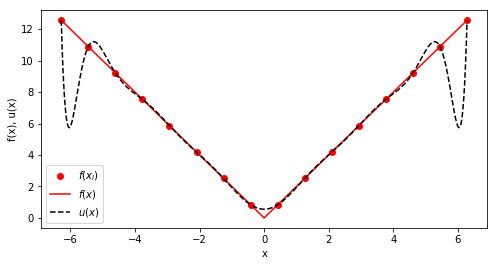

In [30]:
#=======================================================
# Implementation of the collocation method for the 
# approximation of a function f(x) using 
# Lagrange polynomials
#=======================================================

# Import additional numpy functions and constants
#-------------------------------------------------------
from numpy import tanh, cos, sin, pi

# Define the interpolation points xi
#-------------------------------------------------------
N = 15
Omega = [-2*pi, 2*pi]

points = Uniform_nodes(Omega[0], Omega[1], N)
#points = Chebyshev_nodes(Omega[0], Omega[1], N)

x = np.linspace(Omega[0], Omega[1], 501)

# Define known values of f(xi)
#-------------------------------------------------------
#f = lambda x: 10.*(x-1.)**2 - 1.
#f = lambda x: tanh(x-pi)
f = lambda x: abs(2*x)
fi = f(np.array(points))

# Define basis function of Lagrange polynomials
#-------------------------------------------------------
psi = Lagrange_polynomials_01(x, points, N)

# Compute approximation function u(x)
#-------------------------------------------------------
u  = sum(fi[i]*np.array(psi[i]) for i in range(0, N+1))





# Plot results
#-------------------------------------------------------
%matplotlib inline
from matplotlib import pyplot as plt

fig = plt.figure()
fig.set_size_inches(8,4)
ax = fig.add_subplot(111)
fi_plt = ax.plot(points, fi, c='r', ls='None', label='$f(x_i)$', marker='o')
f_plt = ax.plot(x, f(x), c='r', ls='-', label='$f(x)$')
u_plt = ax.plot(x, u, c='k', ls='--', label='$u(x)$')
ax.set_xlabel('x') 
ax.set_ylabel('f(x), u(x)')
ax.legend()
plt.show()